In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
#from api_key import api_key

In [3]:
csv_read = pd.read_csv("../cleaned_2018_texas_accidents.csv")
texas_accidents_df = pd.DataFrame(csv_read)
texas_accidents_df.head()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30


In [77]:
# san antonio accident data
sa_df = texas_accidents_df.loc[texas_accidents_df['City']=='San Antonio']
sa_weather = sa_df.groupby('Weather_Condition')
sa_weather = sa_weather['Time'].count()
sa_weather

Weather_Condition
Clear                            17
Fog                               5
Haze                              1
Heavy Rain                       30
Heavy Thunderstorms and Rain     15
Light Drizzle                    65
Light Freezing Rain               9
Light Rain                      379
Light Snow                        3
Light Thunderstorms and Rain     23
Mostly Cloudy                    41
Overcast                        200
Partly Cloudy                     6
Rain                             36
Scattered Clouds                 10
Thunderstorm                      3
Thunderstorms and Rain           11
Name: Time, dtype: int64

In [112]:
x_axis = sa_weather.index.to_list
x_axis

<bound method IndexOpsMixin.tolist of Index(['Clear', 'Fog', 'Haze', 'Heavy Rain', 'Heavy Thunderstorms and Rain',
       'Light Drizzle', 'Light Freezing Rain', 'Light Rain', 'Light Snow',
       'Light Thunderstorms and Rain', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'Rain', 'Scattered Clouds', 'Thunderstorm',
       'Thunderstorms and Rain'],
      dtype='object', name='Weather_Condition')>

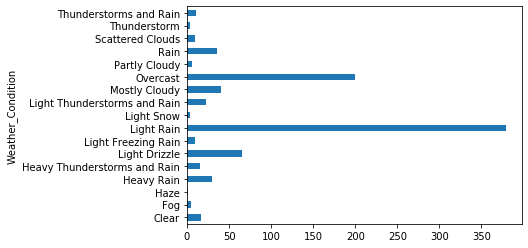

In [119]:
sa_weather.plot.barh(x=x_axis)

In [21]:
sa_visibility = sa_df.groupby('Visibility(mi)')
sa_visibility.count()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
Visibility(mi),,,,,,,,,,,,,,,,,
0.1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
0.2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
0.4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.8,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
0.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
1.2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [75]:
sa_precipitation = sa_df.groupby('Precipitation(in)')
sa_precipitation = sa_precipitation['Time'].count()


In [61]:
sa_temp = sa_df.groupby('Temperature(F)')
temp_count = sa_temp['Time'].count()
print(sa_df['Temperature(F)'].max())

98.1


In [66]:
count = len(temp_count)
count

135

In [35]:
temps = sa_temp['Temperature(F)'].unique()
temps

Temperature(F)
26.1    [26.1]
27.0    [27.0]
27.9    [27.9]
28.0    [28.0]
28.2    [28.2]
         ...  
91.0    [91.0]
91.8    [91.8]
93.9    [93.9]
96.1    [96.1]
98.1    [98.1]
Name: Temperature(F), Length: 135, dtype: object

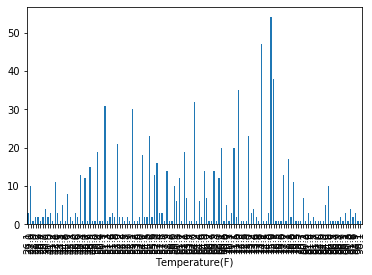

In [74]:
temp_count.plot(kind="bar")